In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats



In [27]:
city = pd.read_csv("raw_data/city_data.csv")
print(city.head())
ride = pd.read_csv("raw_data/ride_data.csv")
ride.head()

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [28]:
merge = pd.merge(city, ride, on = "city",how = "left")
#Average Fare ($) Per City
city_grouped = merge.groupby("city")
fare_per_city = city_grouped["fare"].mean()
#Total Number of Rides Per City
total_riders = city_grouped["ride_id"].count()
#Total Number of Drivers Per City
total_drivers = city_grouped["driver_count"].count()
#City Type (Urban, Suburban, Rural)
city_type = city_grouped['type'].unique()
city_data = pd.DataFrame({
    "Average Fare ($) Per City": fare_per_city,
    "Total Riders": total_riders ,
    "Total Drivers": total_drivers,
    "City Types": city_type
})
city_data.head()

,Average Fare ($) Per City,City Types,Total Drivers,Total Riders
city,,,,
Alvarezhaven,23.928710,[Urban],31,31
Alyssaberg,20.609615,[Urban],26,26
Anitamouth,37.315556,[Suburban],9,9
Antoniomouth,23.625000,[Urban],22,22
Aprilchester,21.981579,[Urban],19,19


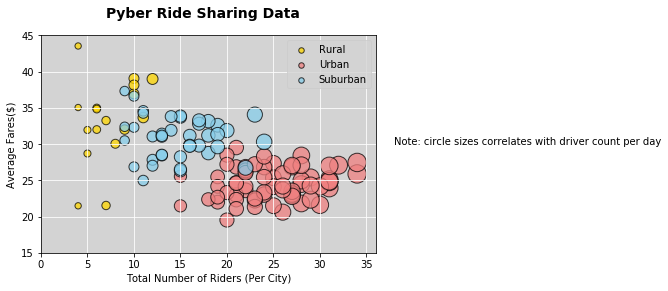

In [29]:
rural = city_data[city_data['City Types'] == 'Rural']
urban = city_data[city_data['City Types'] == 'Urban']
suburban = city_data[city_data['City Types'] == 'Suburban']
plt.scatter(rural["Total Riders"],rural["Average Fare ($) Per City"],marker = "o", facecolors = "gold",edgecolors = "black", s = rural["Total Drivers"]*10,alpha = 0.75, label = "Rural")
plt.scatter(urban["Total Riders"],urban["Average Fare ($) Per City"],marker = "o", facecolors = "lightcoral",edgecolors = "black", s = urban["Total Drivers"]*10,alpha = 0.75, label = "Urban")
plt.scatter(suburban["Total Riders"],suburban["Average Fare ($) Per City"],marker = "o", facecolors = "skyblue",edgecolors = "black", s = suburban["Total Drivers"]*10,alpha = 0.75, label = "Suburban")

legend = plt.legend(loc = "best", numpoints = 1, fontsize = 10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fares($)")
plt.suptitle("Pyber Ride Sharing Data",fontsize = 14,fontweight = "bold")
plt.grid(True,color = 'white')
text = "Note: circle sizes correlates with driver count per day"
plt.text(38,30,text,fontsize = 10)
plt.subplots_adjust()
plt.xlim(0,36)
plt.ylim(15,45)
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

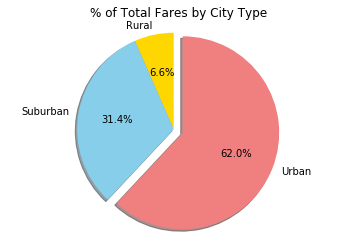

In [30]:
#% of Total Fares by City Type
city_group = merge.groupby(["type"])
fares = city_group["fare"].sum()
labels = fares.index
colors = ["gold","skyblue","lightcoral"]
explode = [0,0,0.1]
plt.pie(fares,explode = explode,colors = colors, labels = labels, startangle = 90,autopct = "%1.1f%%",shadow = True)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

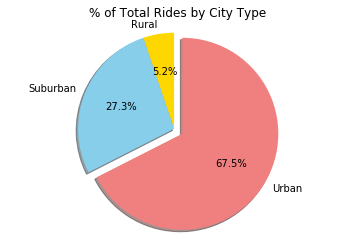

In [31]:
#% of Total Rides by City Type
rides = city_group["ride_id"].count()
colors = ["gold","skyblue","lightcoral"]
explode = [0,0,0.1]
plt.pie(rides,explode = explode,colors = colors, labels = labels, startangle = 90,autopct = "%1.1f%%",shadow = True)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

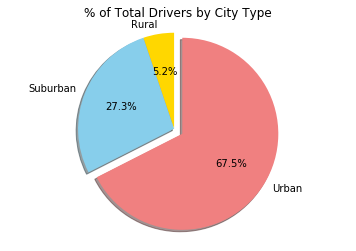

In [32]:
#% of Total Drivers by City Type
drivers = city_group["driver_count"].count()
colors = ["gold","skyblue","lightcoral"]
explode = [0,0,0.1]
plt.pie(drivers,explode = explode,colors = colors, labels = labels, startangle = 90,autopct = "%1.1f%%",shadow = True)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()